In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\1.5.1 data\armenian_pubs.csv')

In [50]:
print(ds)
ds['Occupation'] = ds.Occupation.str.strip()
ds['Fav_Pub'] = ds.Fav_Pub.str.strip()
ds['Fav_Pub'] = ds.Fav_Pub.str.lower()
ds['Fav_Pub'] = ds.Fav_Pub.str.replace('^the ','')
ds['Fav_Pub'] = ds.Fav_Pub.str.replace('37 pub','pub 37')

                        Timestamp  Age  Gender     Income  \
110   2017/02/26 2:49:46 PM GMT+4   22    Male  4500000.0   
108   2017/02/26 1:58:40 PM GMT+4   20    Male   900000.0   
99   2017/02/26 11:57:41 AM GMT+4   20    Male   900000.0   
94   2017/02/26 11:14:33 AM GMT+4   23  Female   700000.0   
71   2017/02/26 12:52:33 AM GMT+4   25    Male   400000.0   
122  2017/02/26 11:52:12 PM GMT+4   39    Male   384000.0   
51   2017/02/25 11:36:22 PM GMT+4   19  Female   300000.0   
156   2017/03/02 1:02:41 PM GMT+4   18  Female   300000.0   
77    2017/02/26 1:33:20 AM GMT+4   18  Female   270000.0   
135   2017/03/02 1:46:19 AM GMT+4   23    Male   250000.0   
83    2017/02/26 2:39:15 AM GMT+4   18    Male   250000.0   
81    2017/02/26 2:15:26 AM GMT+4   25    Male   240000.0   
74    2017/02/26 1:00:24 AM GMT+4   19    Male   200000.0   
13   2017/02/25 10:57:58 PM GMT+4   19    Male   200000.0   
42   2017/02/25 11:15:13 PM GMT+4   20    Male   200000.0   
67   2017/02/26 12:38:48

At First Look

This data set shows how people in a local town  responded when asked a few questions about their prefereances in bars in a specific local area. Based on the questions asked, it woul be easy to extract some demographics of the people in the survey and correlate  their answers based on those. If you take a look below at the favorite pub data, you can see that over 50% of the entries favored five out of thirty options. I believe if used correctly this data set could provide some information to help the bar owners in the area improve their bars in a way that speaks to the local demographics in order to drive up foot traffic and potentially sales. 

First, dive in and explore the data set. Include your code and visuals from this process in your final write up. While doing this, look for something that provokes a question; specifically one that can be answered with an experiment.

In [52]:
age = ds.groupby('Age').count()
print(age['Gender'])
gender = ds.groupby('Gender').count()
print(gender['Age'])
income = ds.groupby('Income').count()
print(income['Age'])
occupation = ds.groupby('Occupation').count()
print(occupation['Age'])
favorite_pub = ds.groupby('Fav_Pub').count()
print(favorite_pub['Age'])
willingness_to_spend = ds.groupby('WTS').count()
print(willingness_to_spend['Age'])
frequency = ds.groupby('Freq').count()
print(frequency['Age'])

Age
16     2
17    10
18    49
19    48
20    31
21    20
22     4
23     5
25     2
26     2
39     1
41     1
Name: Gender, dtype: int64
Gender
Female    102
Male       73
Name: Age, dtype: int64
Income
0.0          44
400.0         1
5000.0        1
10000.0       3
20000.0       4
25000.0       3
30000.0      11
35000.0       1
40000.0       6
50000.0      12
55000.0       2
60000.0       8
70000.0       7
75000.0       1
80000.0      12
90000.0       4
100000.0     14
120000.0      6
130000.0      2
140000.0      1
150000.0      7
170000.0      1
180000.0      1
190000.0      1
200000.0      9
240000.0      1
250000.0      2
270000.0      1
300000.0      2
384000.0      1
400000.0      1
700000.0      1
900000.0      2
4500000.0     1
Name: Age, dtype: int64
Occupation
CEO                                   1
Entrepreneur / Software Engineer      1
Student                             122
Student + working                    40
Working                              10
army            

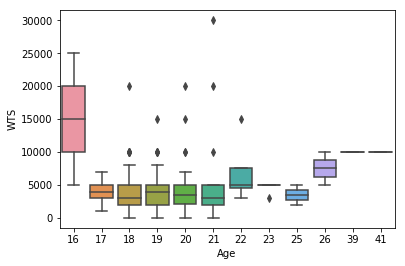

In [4]:
ax = sns.boxplot(x='Age', y='WTS', data=ds)

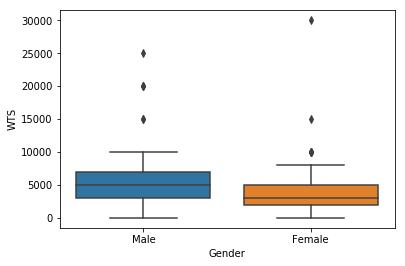

In [5]:
ax = sns.boxplot(x='Gender', y='WTS', data=ds)

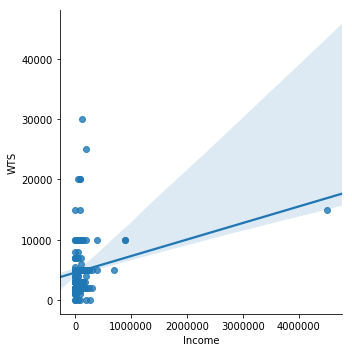

In [6]:
ds = ds.sort_values(by = 'Income', ascending = False)
ax = sns.lmplot(y='WTS', x='Income', data=ds)    

Data Summary

After a short look at the data entries and some base correlations, we can identify a few issues with the data. First of all, the sample sizes are way too low to get an average read of a downtown area. The largest age block is less than fifty people and a majority of the ages have a population of below twenty. Not only that, but there are huge gaps after the age of twenty six which will definitely skew the data because there is no way the demographic of bar going patrons in any area are 98+% under twenty six. In order to make this set useful, we will need to update the study laid out in the experiment section below

Business Value

As stated earlier, businesses in the area seem to be either missrepresented in this study, or there is a large skew of people going to particular venues. By updating the data, we can use correlations between demographic in order to help the smaller, less popular businesses find out the exact reasons why they are not bringing is as large a crowd as their competitors. At first look, the category WTS which stands for willingness to sell, is among the most important. Without actually looking at the books of each bar, we can use this metric to estimate how much each bar can make by targeting certain crowds. For example, targeting seventeen year olds might be good to increase the number of people spending time in your bar, but might lower your revenue because this demographic spends a lot less than others. By correlation WTS to all the other categories, bars can see exactly what group of people will increase revenue and what those people are intrerested in.

RFC Hypothesis

If we take data from this set and add a wider range of ages, as well as a higher sample of all ages, we can test for a corrlelation between a lot of the variables and willingness to spend. This could be useful to help bars in this area attract a clientele willing to spend the most amount of money. We would expect willingness to spend to go up as people get older and then hit a peak around middle age and drop back down again. We would expect income to increase directly with willingness to spend. We would expect men to spend more money than women. We would expect people who are working to spend more than students and so on.

RFC Experiment 

Most of the experiment is identical to what has already been done, except with more trials. Based on the data provided, and the purpose of the test, it is clear more peoplefo all age groups need to be included in order to accurately representthe population. In person representatives could go to bars represented in this study and try to get people to answer the questionnaire in exchange for entry to win some sort of cash prize. They should also be intrusive instea of allowing people to come to them in order to get not only the most respondants, but also to stop any skew in the data because a particular demographic is more outgoing. While people who do not usually go to bars can be useful in some areas, it might also be important to cut out the people who replied that they do not like pubs because they are not the people who the owners are targeting. These people usually do not want to come any way and are unlikely to increase frequency with changes. 

RFC Success

The goal of this increased study size is to help local bars in the area understand the demographics and use this to increase sales or traffic. Success is achieved by pulling data with clear correlations no matter what that actual correlation is. We are even more successful if the data matches our predictions in each category because we can then use logic to explain the correlation and use the information. If the data shows high r-values from t-tests and linear regressions, where necessary, above .05 then we would call this RFC a failure because it is hard to target specific demographics if you are not sure if the correlations are random or by the product of actual correlations.